**DATASET PREPARATION AND EXPLORATION**

**Loading Libraries**

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

**Loading the Dataset**



In [31]:
!unzip -qo /content/customer_booking.zip -d /content/customer_booking
# Load up our diabetes dataset
try:
    booking_data = pd.read_csv('/content/customer_booking/customer_booking.csv', encoding='latin-1')
except UnicodeDecodeError:
    booking_data = pd.read_csv('/content/customer_booking/customer_booking.csv', encoding='cp1252')

**Explortary Data Analysis and Visualization**



In [32]:
print(f"The dataset has {booking_data.shape[0]} records and {booking_data.shape[1]} Fields")
print(f"Feature Columns: {list(booking_data.columns)}")


# Data summary
print("\n" + "="*50)
print("Data summary:")
print("="*50)
print(booking_data.describe())

#Showing the first and last five records
print("\n" + "="*50)
print("First five Records in our dataset:")
print("="*50)
print(booking_data.head(5))


print("\n" + "="*50)
print("Last five records in our dataset:")
print("="*50)
print(booking_data.tail(5))


# Checking if there are records with null values
print("\n" + "="*50)
print("\nChecking fields with empty values\n")
print("\n" + "="*50)
print(booking_data.isnull().sum())

The dataset has 50000 records and 14 Fields
Feature Columns: ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

Data summary:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  w

Data Visualization and Distributions

booking_complete
0    42522
1     7478
Name: count, dtype: int64


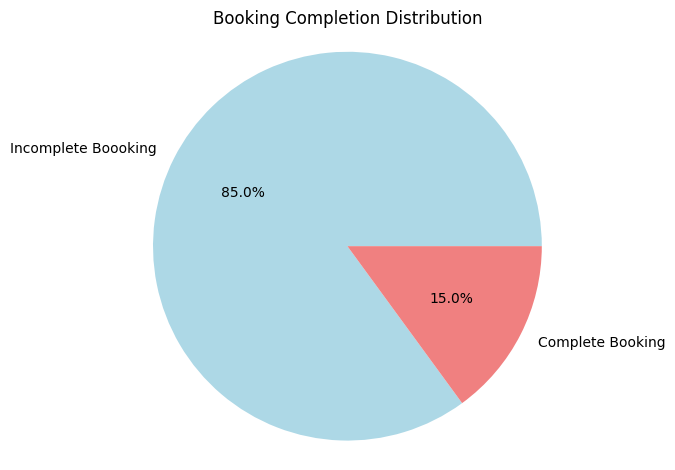

In [33]:
# Visualizing how many people have completed booking vs not
fig, ax = plt.subplots()

booking_counts = booking_data['booking_complete'].value_counts()
print(booking_counts)
ax.pie(booking_counts.values, labels=['Incomplete Boooking', 'Complete Booking'],
       autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax.set_title('Booking Completion Distribution')
ax.axis('equal')

sns.despine(left=True)
plt.tight_layout()
plt.show()

Changing some categorical (string) data columns to numbers, and dropping those with high unique values.

In [34]:
#Checking different unique values for each categorical column
sales_channel = booking_data['sales_channel'].value_counts()
print(f"\n{sales_channel}")

trip_type = booking_data['trip_type'].value_counts()
print(f"\n{trip_type}")

flight_day = booking_data['flight_day'].value_counts()
print(f"\n{flight_day}")

route = booking_data['route'].value_counts()
print(f"\n{route}")

booking_origin = booking_data['booking_origin'].value_counts()
print(f"\n{booking_origin}")


# New dataset with dropped high cardinality fields
booking_data = booking_data.drop(['route', 'booking_origin'], axis=1)

# Hot Encoding other categorical columns
booking_data.replace(
    {
        "sales_channel": {'Internet': 0, 'Mobile': 1},
        "trip_type": {'RoundTrip': 0, 'OneWay': 1, 'CircleTrip': 2},
        "flight_day": {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
    },
    inplace=True
)



sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
HKTJED       1
KBRWUH       1
KTMTWU       1
AKLHGH       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64


/tmp/ipython-input-433162240.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  booking_data.replace(


Preprocessed dataset

In [38]:
booking_data.head(5)
booking_data.tail(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,0,0,27,6,9,5,1,0,1,5.62,0
49996,1,0,0,111,6,4,6,0,0,0,5.62,0
49997,1,0,0,24,6,22,5,0,0,1,5.62,0
49998,1,0,0,15,6,11,0,1,0,1,5.62,0
49999,1,0,0,19,6,10,3,0,1,0,5.62,0


from matplotlib import pyplot as plt
_df_0['num_passengers'].plot(kind='hist', bins=20, title='num_passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['purchase_lead'].plot(kind='hist', bins=20, title='purchase_lead')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['flight_hour'].plot(kind='hist', bins=20, title='flight_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['flight_day'].plot(kind='hist', bins=20, title='flight_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='num_passengers', y='purchase_lead', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='purchase_lead', y='flight_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='flight_hour', y='flight_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='flight_day', y='wants_extra_baggage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sales_channel']
  ys = series['num_passengers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('sales_channel', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sales_channel')
_ = plt.ylabel('num_passengers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sales_channel']
  ys = series['purchase_lead']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('sales_channel', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sales_channel')
_ = plt.ylabel('purchase_lead')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sales_channel']
  ys = series['flight_hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('sales_channel', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sales_channel')
_ = plt.ylabel('flight_hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sales_channel']
  ys = series['flight_day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('sales_channel', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sales_channel')
_ = plt.ylabel('flight_day')

from matplotlib import pyplot as plt
_df_12['num_passengers'].plot(kind='line', figsize=(8, 4), title='num_passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['purchase_lead'].plot(kind='line', figsize=(8, 4), title='purchase_lead')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['flight_hour'].plot(kind='line', figsize=(8, 4), title='flight_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['flight_day'].plot(kind='line', figsize=(8, 4), title='flight_day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['num_passengers'].plot(kind='hist', bins=20, title='num_passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['purchase_lead'].plot(kind='hist', bins=20, title='purchase_lead')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['flight_hour'].plot(kind='hist', bins=20, title='flight_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='num_passengers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='num_passengers', y='purchase_lead', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='purchase_lead', y='flight_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='flight_hour', y='flight_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['num_passengers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('num_passengers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['purchase_lead']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('purchase_lead')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['flight_hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('flight_hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['flight_day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('flight_day')

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['num_passengers'].plot(kind='line', figsize=(8, 4), title='num_passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['purchase_lead'].plot(kind='line', figsize=(8, 4), title='purchase_lead')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['flight_hour'].plot(kind='line', figsize=(8, 4), title='flight_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'How fields relate')

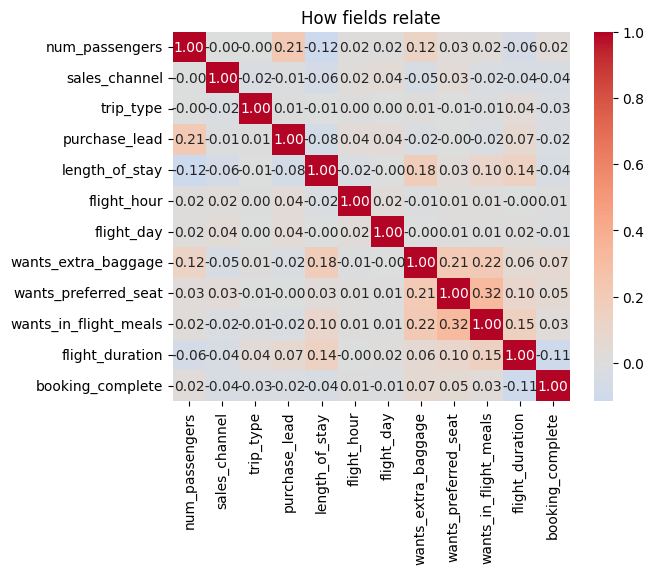

In [36]:
# Checking how different measurements relate to each other
fig, ax = plt.subplots()
correlation_map = booking_data.corr()
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', center=0, ax=ax, fmt='.2f')
ax.set_title('How fields relate')

**Getting feature columns and target column**

In [60]:
# features (X) and target (y)
X_measurements = booking_data.drop('booking_complete', axis=1)
y_booking_status = booking_data['booking_complete']

**Balancing the data to avoid Bias and Overfitting**

In [95]:
# Oversampling the minority class, to avoid model bias and overfitting
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_measurements, y_booking_status = smote.fit_resample(X_measurements, y_booking_status)


**Standardizing the data**

In [96]:
# Standardize the measurements so they're all on similar scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_measurements)
# Scaled measurements.
print("Scaled measurements:")
print(X_scaled[:5])

Scaled measurements:
[[ 0.53472338 -0.27588277 -0.0745251   1.98869792 -0.07435718 -0.36866022
   1.22640307  0.75193714 -0.55362436 -0.73549932 -1.09061986]
 [-0.53825607 -0.27588277 -0.0745251   0.32563946 -0.04468214 -1.12934856
   1.22640307 -1.3298984  -0.55362436 -0.73549932 -1.09061986]
 [ 0.53472338 -0.27588277 -0.0745251   1.77804385  0.01466794  1.53306061
  -0.33771834  0.75193714  1.8062789  -0.73549932 -1.09061986]
 [-0.53825607 -0.27588277 -0.0745251   0.14824655  0.28174328 -0.93917647
   1.22640307 -1.3298984  -0.55362436  1.35962056 -1.09061986]
 [ 0.53472338 -0.27588277 -0.0745251  -0.16219103  0.01466794  1.15271644
  -0.33771834  0.75193714 -0.55362436  1.35962056 -1.09061986]]


# Training a machine learning model

**Splitting the dataset into train and test**

In [97]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_booking_status,
    test_size=0.2,
    stratify=y_booking_status,
    random_state=42
)

**Training the model**

In [98]:
# Model training
customer_booking_model = RandomForestClassifier(n_estimators=100,max_depth=30, min_samples_leaf=1, random_state=42,class_weight='balanced')
customer_booking_model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


# MODEL EVALUATION AND FINDINGS

**Evaluating Model Performance**

Training accuracy: 0.999 (99.9%)
Test accuracy: 0.867 (86.7%)

Detailed performance report:
                    precision    recall  f1-score   support

Incomplete Booking       0.86      0.88      0.87      8505
  Complete Booking       0.88      0.86      0.87      8504

          accuracy                           0.87     17009
         macro avg       0.87      0.87      0.87     17009
      weighted avg       0.87      0.87      0.87     17009



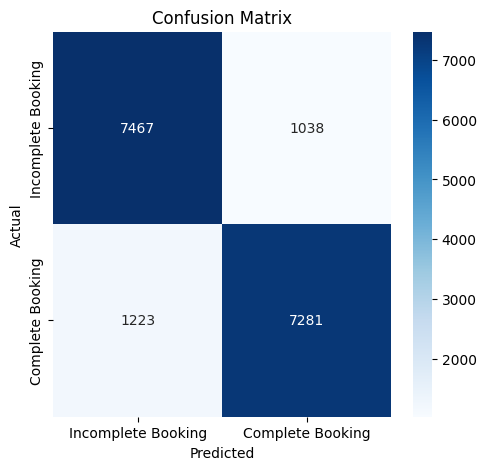

In [93]:
# Accuracy on training data
train_predictions = customer_booking_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)


# Accuracy on test data (new, unseen data)
test_predictions = customer_booking_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Percentage accuracy
print(f"Training accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
print(f"Test accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")



# Classification Report RF
print("\nDetailed performance report:")
print(classification_report(y_test, test_predictions,
                            target_names=['Incomplete Booking', 'Complete Booking']))

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
confusion = confusion_matrix(y_test, test_predictions)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Incomplete Booking', 'Complete Booking'],
            yticklabels=['Incomplete Booking', 'Complete Booking'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Feature Importance (Variable Contribution)**


Which measurements matter most for prediction:
              Measurement  Importance
10        flight_duration    0.311967
3           purchase_lead    0.216666
5             flight_hour    0.142204
4          length_of_stay    0.129148
6              flight_day    0.081734
1           sales_channel    0.033888
0          num_passengers    0.031667
9   wants_in_flight_meals    0.017658
7     wants_extra_baggage    0.017606
8    wants_preferred_seat    0.014404
2               trip_type    0.003059


/tmp/ipython-input-779520393.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Measurement', data=importance_scores, palette='viridis')


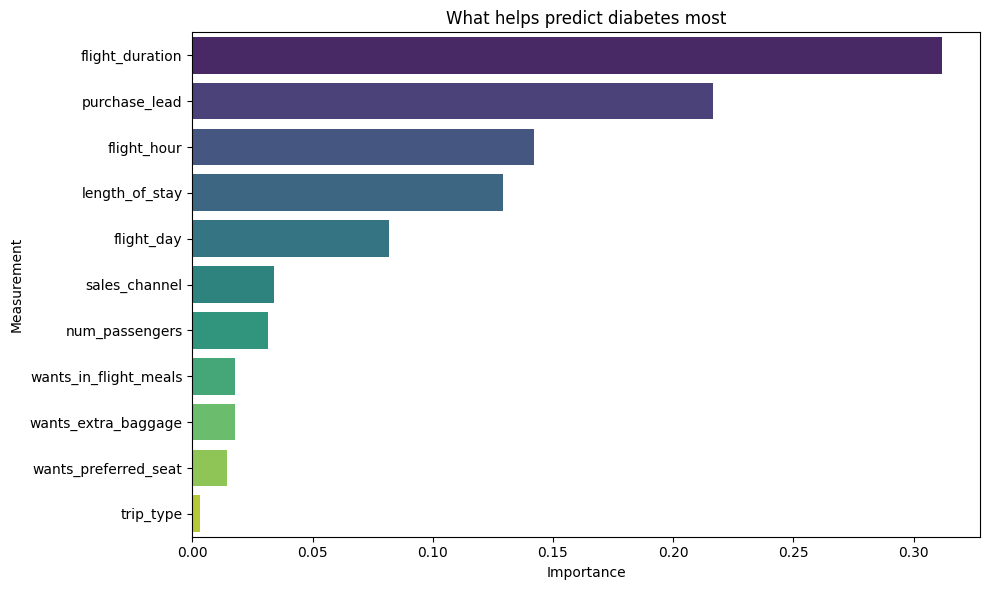

In [94]:
# Most important for measurements prediction

if hasattr(customer_booking_model, 'feature_importances_'):
    importance_scores = pd.DataFrame({
        'Measurement': X_measurements.columns,
        'Importance': customer_booking_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nWhich measurements matter most for prediction:")
    print(importance_scores)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Measurement', data=importance_scores, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Measurement')
    plt.title('What helps predict diabetes most')
    plt.tight_layout()
    plt.show()